<a href="https://colab.research.google.com/github/amrahmani/NN/blob/main/Ch7_CNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem: Image Classification with MNIST**

Using PyTorch, create a **convolutional neural network (CNN), LeNet CNN architecture** model for classifying handwritten digits from the MNIST dataset. Then, train the model using the training dataset and evaluate its performance on the test dataset.

**Import Libraries**

In [3]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

**Load and Prepare Dataset**

In [4]:
# Define transformations for preprocessing the input images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize MNIST data
])

# Load MNIST datasets for training and testing
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for efficiently loading the data during training and testing
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 21839836.89it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 647410.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5608149.46it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7556734.93it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**Define and Train the CNN**

In [5]:
# Define the Convolutional Neural Network (CNN) model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First convolutional layer: input channels=1 (grayscale), output channels=6 feature maps, kernel size=3x3, stride=1 moves 1 pixel
        # OutputSizeDimension=(InputDimension-kernel_size+1)/stride, Input=28x28 handwritten digits, Height=Width=28 => Outputsize=(28-3+1)/1=26, ImageSize=26x26
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=0)
        # Max pooling layer with kernel size=2x2, stride=2 moves 2 pixels
        # OutputSizeDimension=(InputDimension-kernel_size+1)/stride, InputFromPreviousLayer=26x26, Height=Width=26 => Outputsize=(26-2+1)/2=12.5 => 12,  ImageSize=12x12
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Second convolutional layer: input channels=6 (from previous layer), output channels=16, kernel size=3x3, stride=1
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=0)
        # Fully connected layer: input size=16x5x5 (from previous layer), output size=120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Fully connected layer: input size=120 (from previous layer), output size=84
        self.fc2 = nn.Linear(120, 84)
        # Output layer: input size=84 (from previous layer), output size=10 (number of classes)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Forward pass through the first convolutional layer, followed by ReLU activation and max pooling
        x = self.pool(nn.functional.relu(self.conv1(x)))
        # Forward pass through the second convolutional layer, followed by ReLU activation and max pooling
        x = self.pool(nn.functional.relu(self.conv2(x)))
        # Reshape the output tensor to fit the fully connected layer
        flattened_x = x.view(-1, 16 * 5 * 5)
        # Forward pass through the first fully connected layer, followed by ReLU activation
        x = nn.functional.relu(self.fc1(flattened_x))
        # Forward pass through the second fully connected layer, followed by ReLU activation
        x = nn.functional.relu(self.fc2(x))
        # Output layer with no activation function applied
        x = self.fc3(x)
        return x

# Create an instance of the CNN model
model = CNN()

# Define loss function (cross-entropy) and optimizer (Adam) for training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)
        # Adjust target labels to match output size
        target_labels = labels[:outputs.size(0)]
        # Calculate the loss
        loss = criterion(outputs, target_labels)
        # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.zero_grad()
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()

        # Print loss statistics
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/1], Step [100/938], Loss: 0.8550
Epoch [1/1], Step [200/938], Loss: 0.2043
Epoch [1/1], Step [300/938], Loss: 0.2316
Epoch [1/1], Step [400/938], Loss: 0.1250
Epoch [1/1], Step [500/938], Loss: 0.2044
Epoch [1/1], Step [600/938], Loss: 0.0369
Epoch [1/1], Step [700/938], Loss: 0.1264
Epoch [1/1], Step [800/938], Loss: 0.0308
Epoch [1/1], Step [900/938], Loss: 0.1286


**Test the CNN and Calculate Accuracy**

In [6]:
# Test the trained model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)
        # Get predicted labels
        _, predicted = torch.max(outputs.data, 1)
        # Total number of labels
        total += labels.size(0)
        # Total number of correct predictions
        correct += (predicted == labels).sum().item()

    # Print the accuracy of the model on the test dataset
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10000 test images: 97.22%


Visualize and understand the feature maps learned by the CNN's convolutional layers.

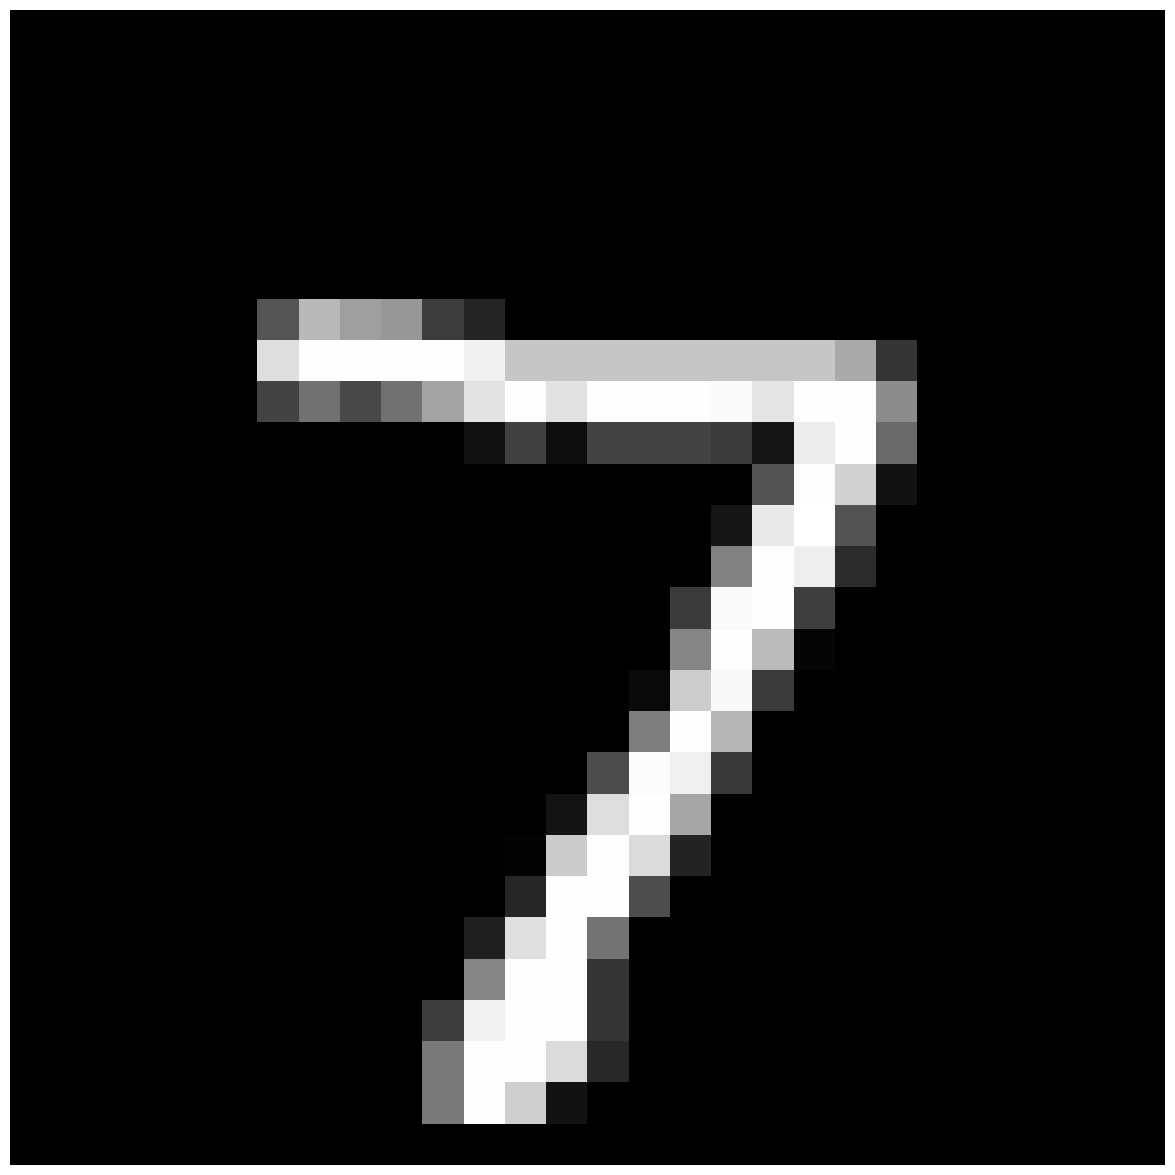

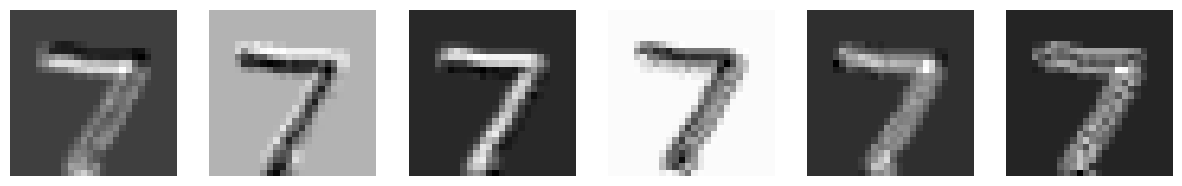

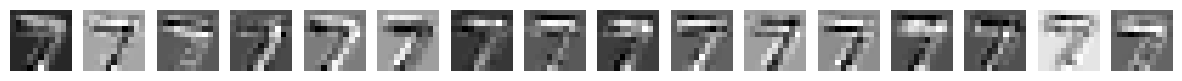

In [25]:
import numpy as np
import matplotlib.pyplot as plt


# Load dataset and define CNN (use the previous SimpleCNN and train_model functions)
model = CNN()
# Function to visualize feature maps


def visualize_feature_maps(model, test_loader):
    data, _ = next(iter(test_loader))
    data = data[0:1]  # Take one sample

    # Get the number of channels in the input image
    num_channels = data.shape[1]

    # Create subplots based on number of channels, ensuring we get an iterable axes object
    fig, axes = plt.subplots(1, num_channels, figsize=(15, 15), squeeze=False)
    for i, ax in enumerate(axes.flatten()): # Flatten axes array for iteration
        ax.imshow(data[0, i, :, :], cmap='gray')
        ax.axis('off')
    plt.show()

    with torch.no_grad():
        conv1_output = model.conv1(data).numpy()
        conv2_output = model.conv2(nn.functional.relu(nn.functional.max_pool2d(model.conv1(data), 2))).numpy()

    # Plotting the feature maps from the first convolutional layer
    num_feature_maps_conv1 = conv1_output.shape[1] # Get the number of feature maps in the first layer
    fig, axes = plt.subplots(1, num_feature_maps_conv1, figsize=(15, 15), squeeze=False) # Create subplots, ensuring iterable axes
    for i, ax in enumerate(axes.flatten()): # Flatten for iteration
        ax.imshow(conv1_output[0, i, :, :], cmap='gray')
        ax.axis('off')
    plt.show()

    # Plotting the feature maps from the second convolutional layer
    num_feature_maps_conv2 = conv2_output.shape[1] # Get the number of feature maps in the second layer
    fig, axes = plt.subplots(1, num_feature_maps_conv2, figsize=(15, 15), squeeze=False) # Create subplots, ensuring iterable axes
    for i, ax in enumerate(axes.flatten()): # Flatten for iteration
        ax.imshow(conv2_output[0, i, :, :], cmap='gray')
        ax.axis('off')
    plt.show()

# Visualize the feature maps
visualize_feature_maps(model, test_loader)

Compare the performance of different optimizers (SGD, Adam, on CNN training.

Experiment with different hyperparameters (learning rate, batch size) to optimize CNN performance.

Design a new CNN architecture different from LeNet (e.g., using different kernel sizes, number of filters).
Train the custom CNN on the MNIST dataset.
Evaluate and compare the performance with LeNet.